In [1]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 16 # 128 reduce batch_size

In [7]:
model = tf.keras.Sequential()

In [8]:
# L1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [9]:
# L2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [10]:
# L3 fully connected
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8010      
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
____________________________________________________

In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.1592 - accuracy: 0.9520
Epoch 2/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0605 - accuracy: 0.98164s - loss: 0.0616 - accuracy: 0. - - ETA: 3s - l
Epoch 3/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0450 - accuracy: 0.98580s - loss: 0.0451 - accuracy: 
Epoch 4/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 5/12
3750/3750 [==============================] - 40s 11ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 6/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0229 - accuracy: 0.9931
Epoch 7/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 8/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0175 - accuracy: 0.9942
Epoch 9/12
3750/3750 [==============================] - 41s 11ms/step - loss: 0.0148 - acc

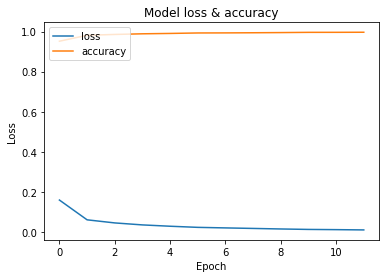

[0.994183361530304, 0.9950666427612305, 0.9962000250816345, 0.9963333606719971, 0.9967333078384399]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [16]:
# predict 10 random hand-writing data
y_predicted = model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,"actual y: ", np.argmax(y_test[random_index]),"predicted y: ", np.argmax(y_predicted[random_index]))

index:  1562 actual y:  8 predicted y:  8
index:  3044 actual y:  0 predicted y:  0
index:  3048 actual y:  2 predicted y:  2
index:  3640 actual y:  0 predicted y:  0
index:  1862 actual y:  4 predicted y:  4
index:  5456 actual y:  9 predicted y:  9
index:  1379 actual y:  0 predicted y:  0
index:  1249 actual y:  8 predicted y:  8
index:  2209 actual y:  0 predicted y:  0
index:  9265 actual y:  1 predicted y:  1


In [17]:
evaluation = model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0392 - accuracy: 0.9896
loss:  0.039184749126434326
accuracy 0.9896000027656555
